# CA03 – Decision Tree **Algorithm**

# **1. Data Source and Contents**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(url)

df.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

# **2. Data Quality Analysis (DQA)**

In [ ]:
# Basic structure
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)


Shape: (48842, 11)

Data Types:
 hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [ ]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
                   y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [ ]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [ ]:
# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 40012


In [ ]:
#using ydataprofiling library to generate report and correlation matrix.
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Census Data Report", explorative=True)
profile.to_file("census_report.html")

from google.colab import files
files.download("census_report.html")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.2 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:01<00:00,  7.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Below are screenshots from the report as long with the alerts

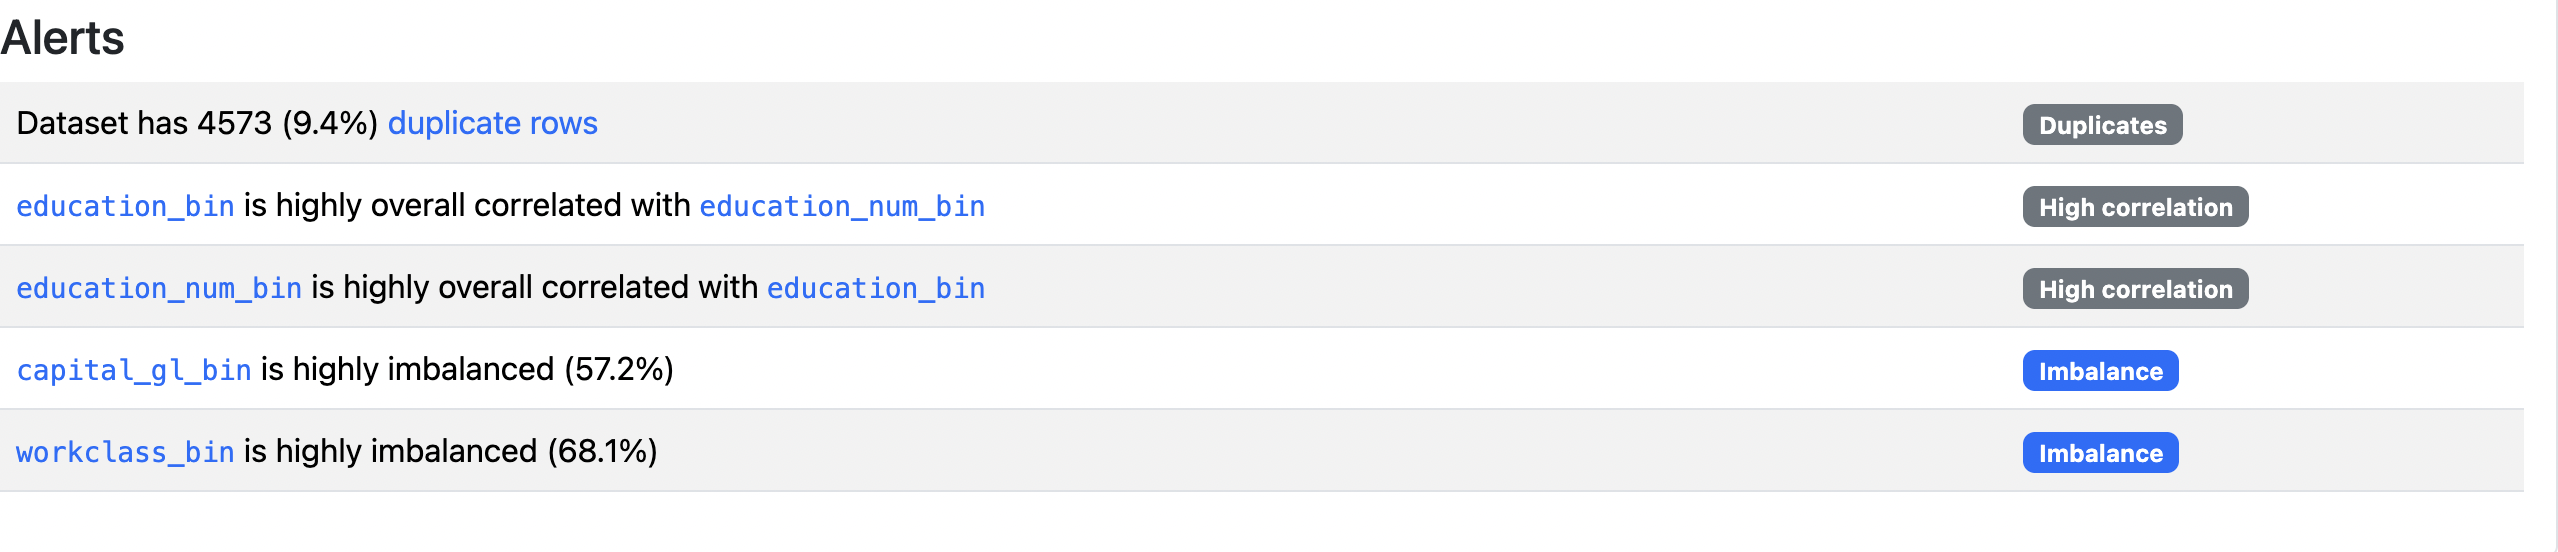

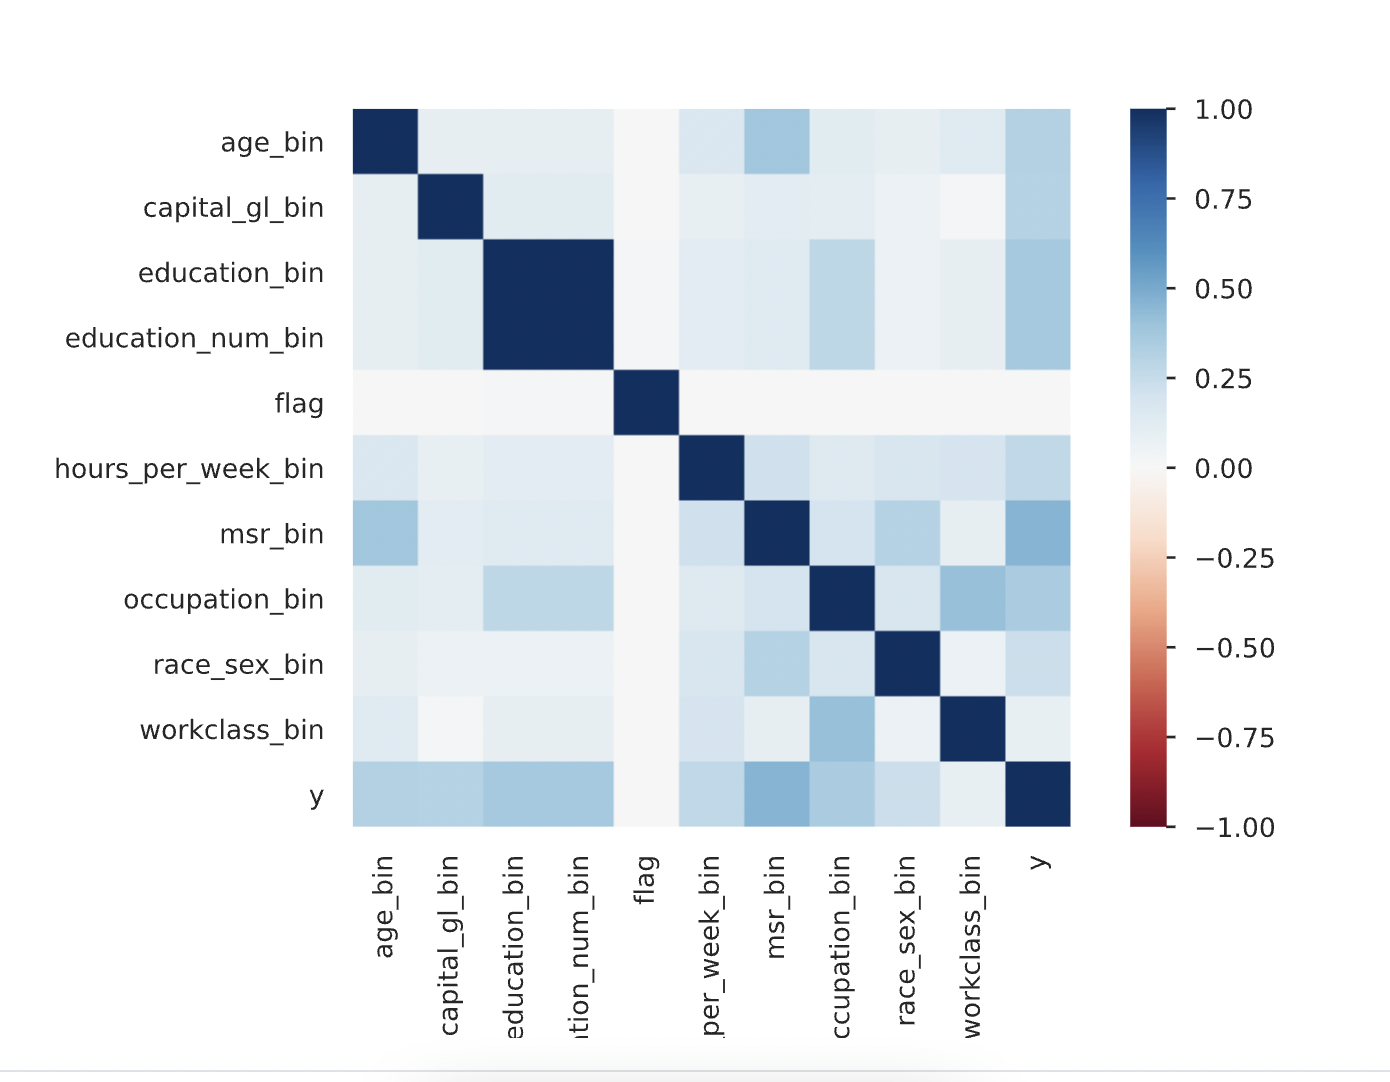

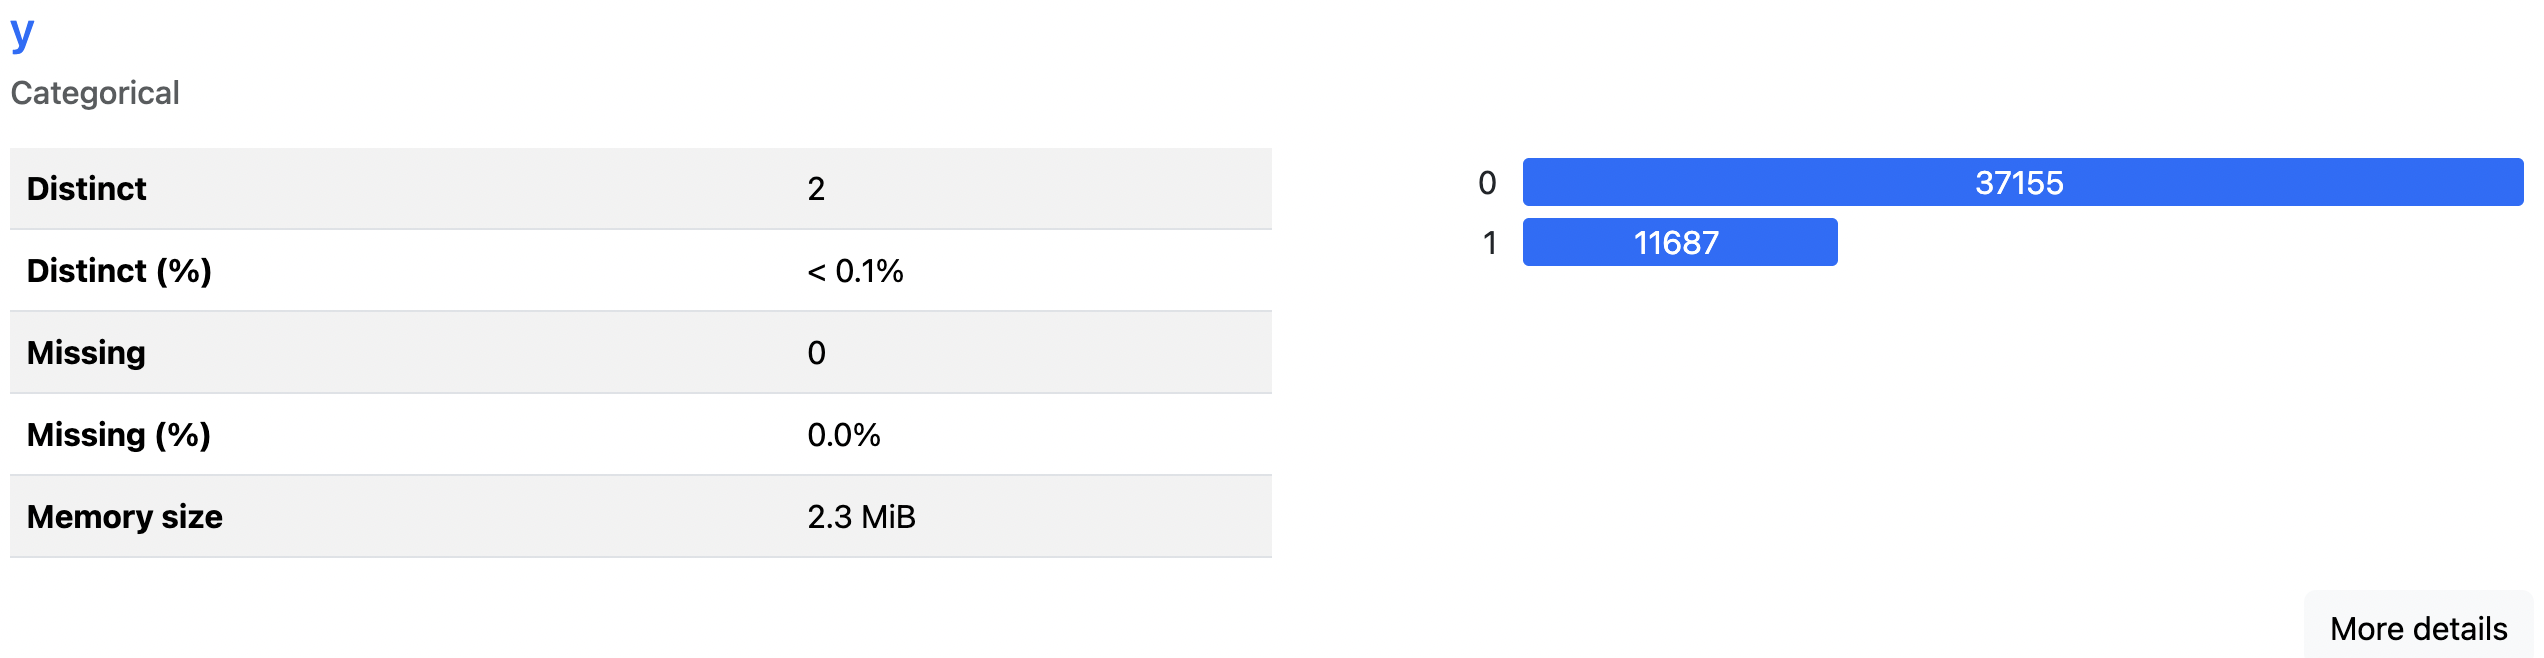

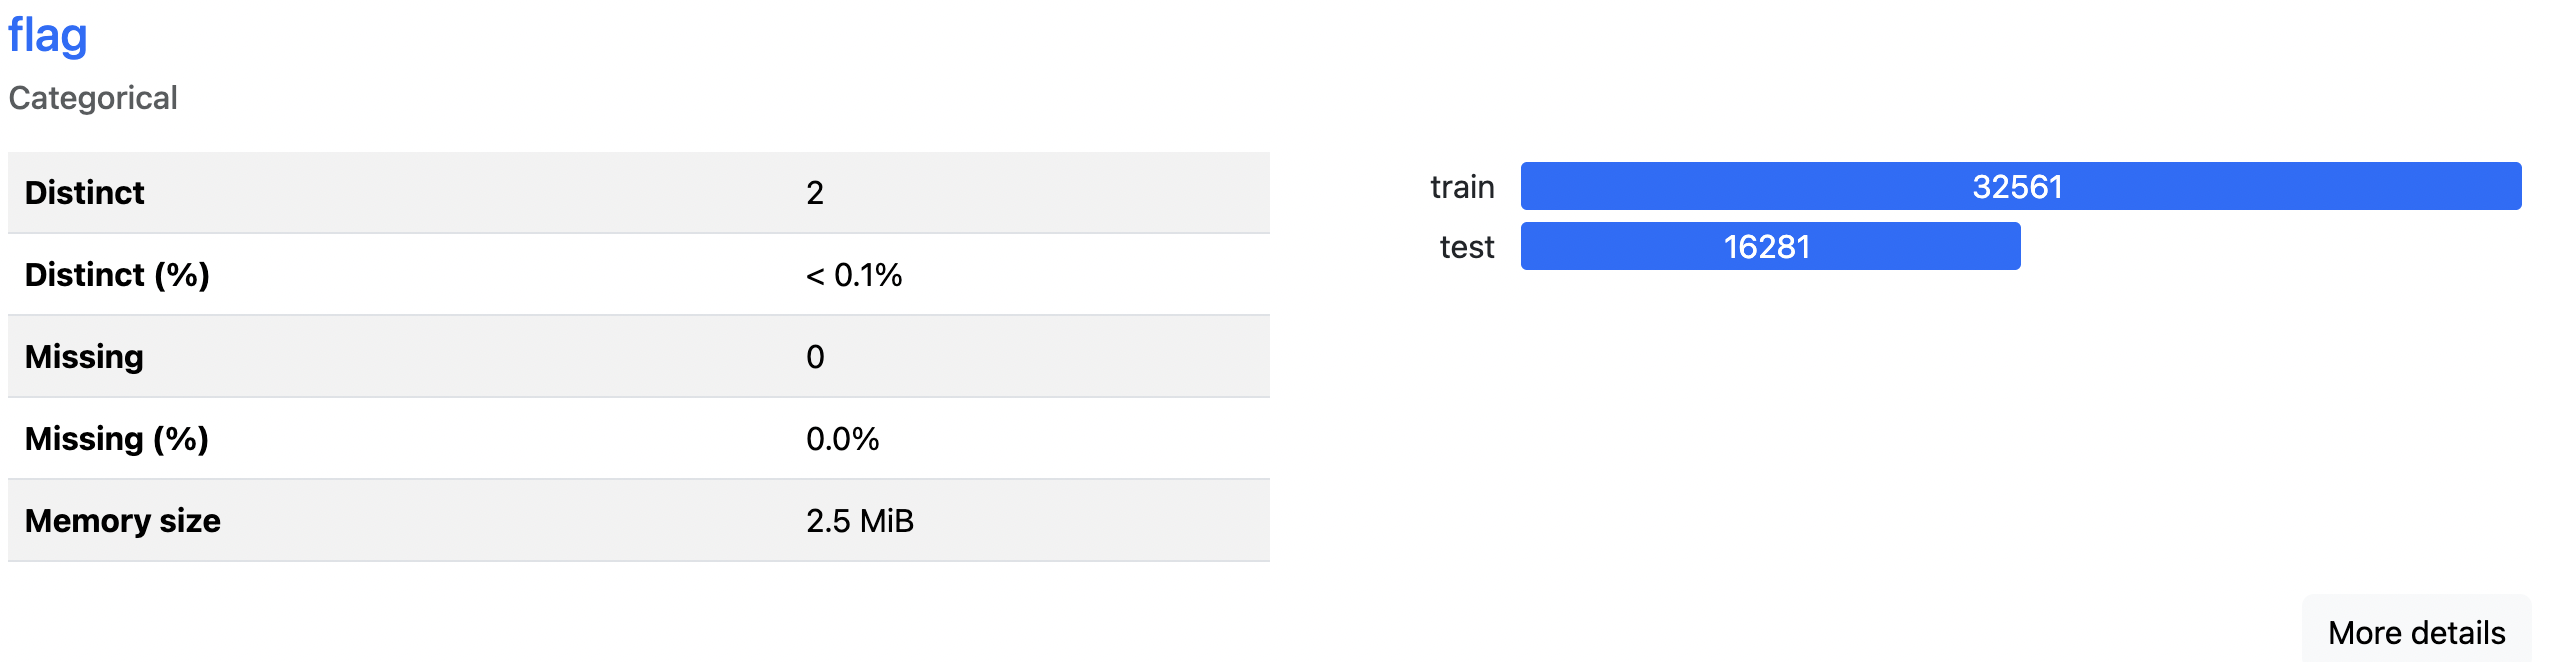

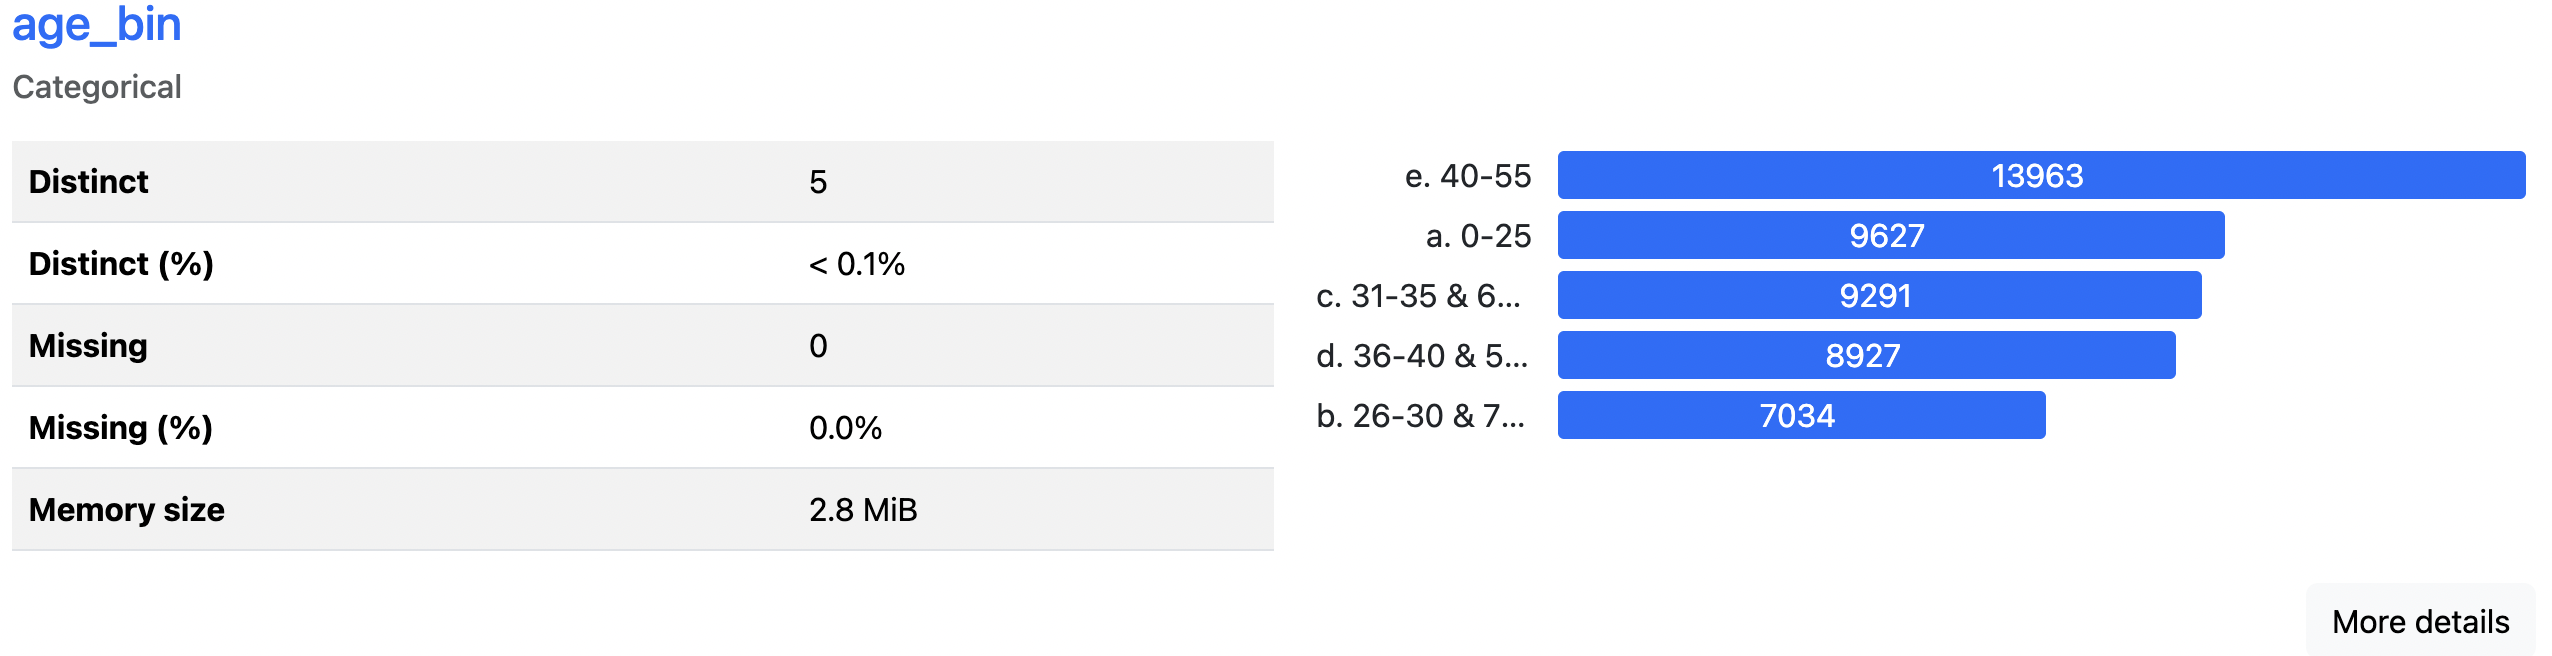

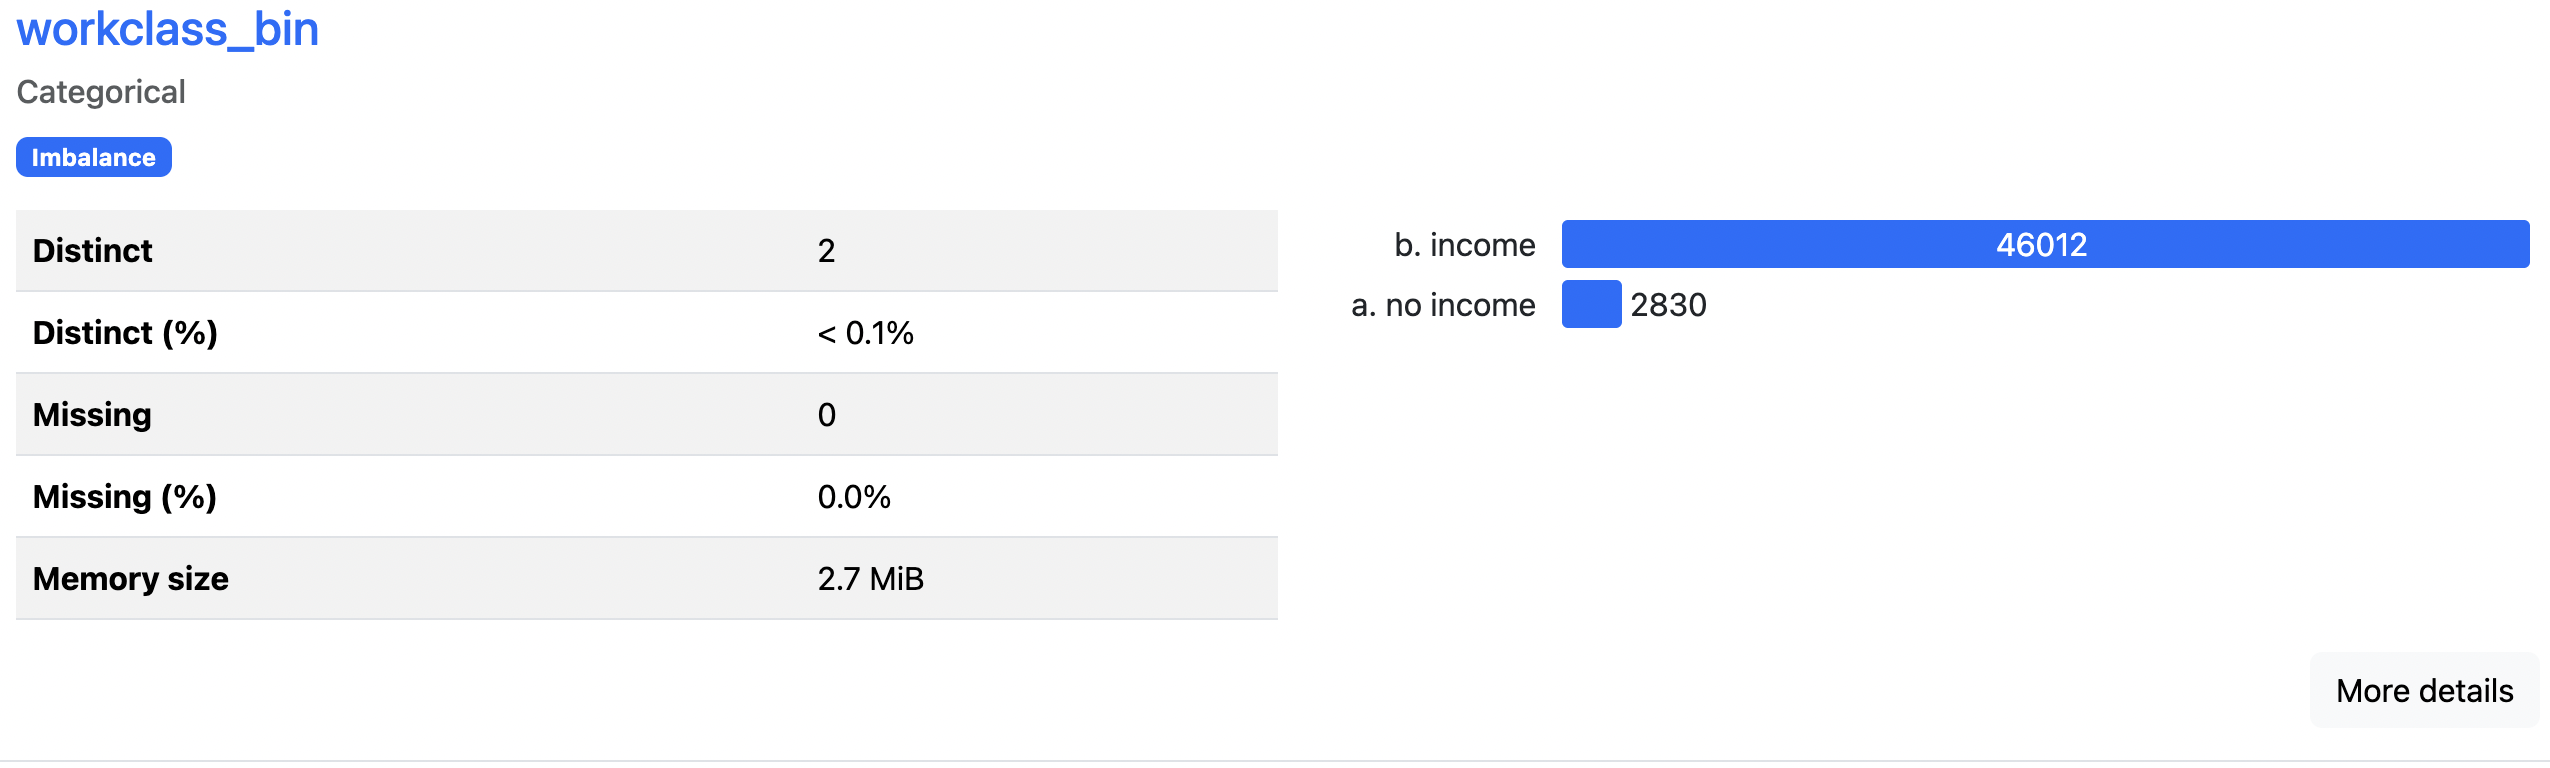

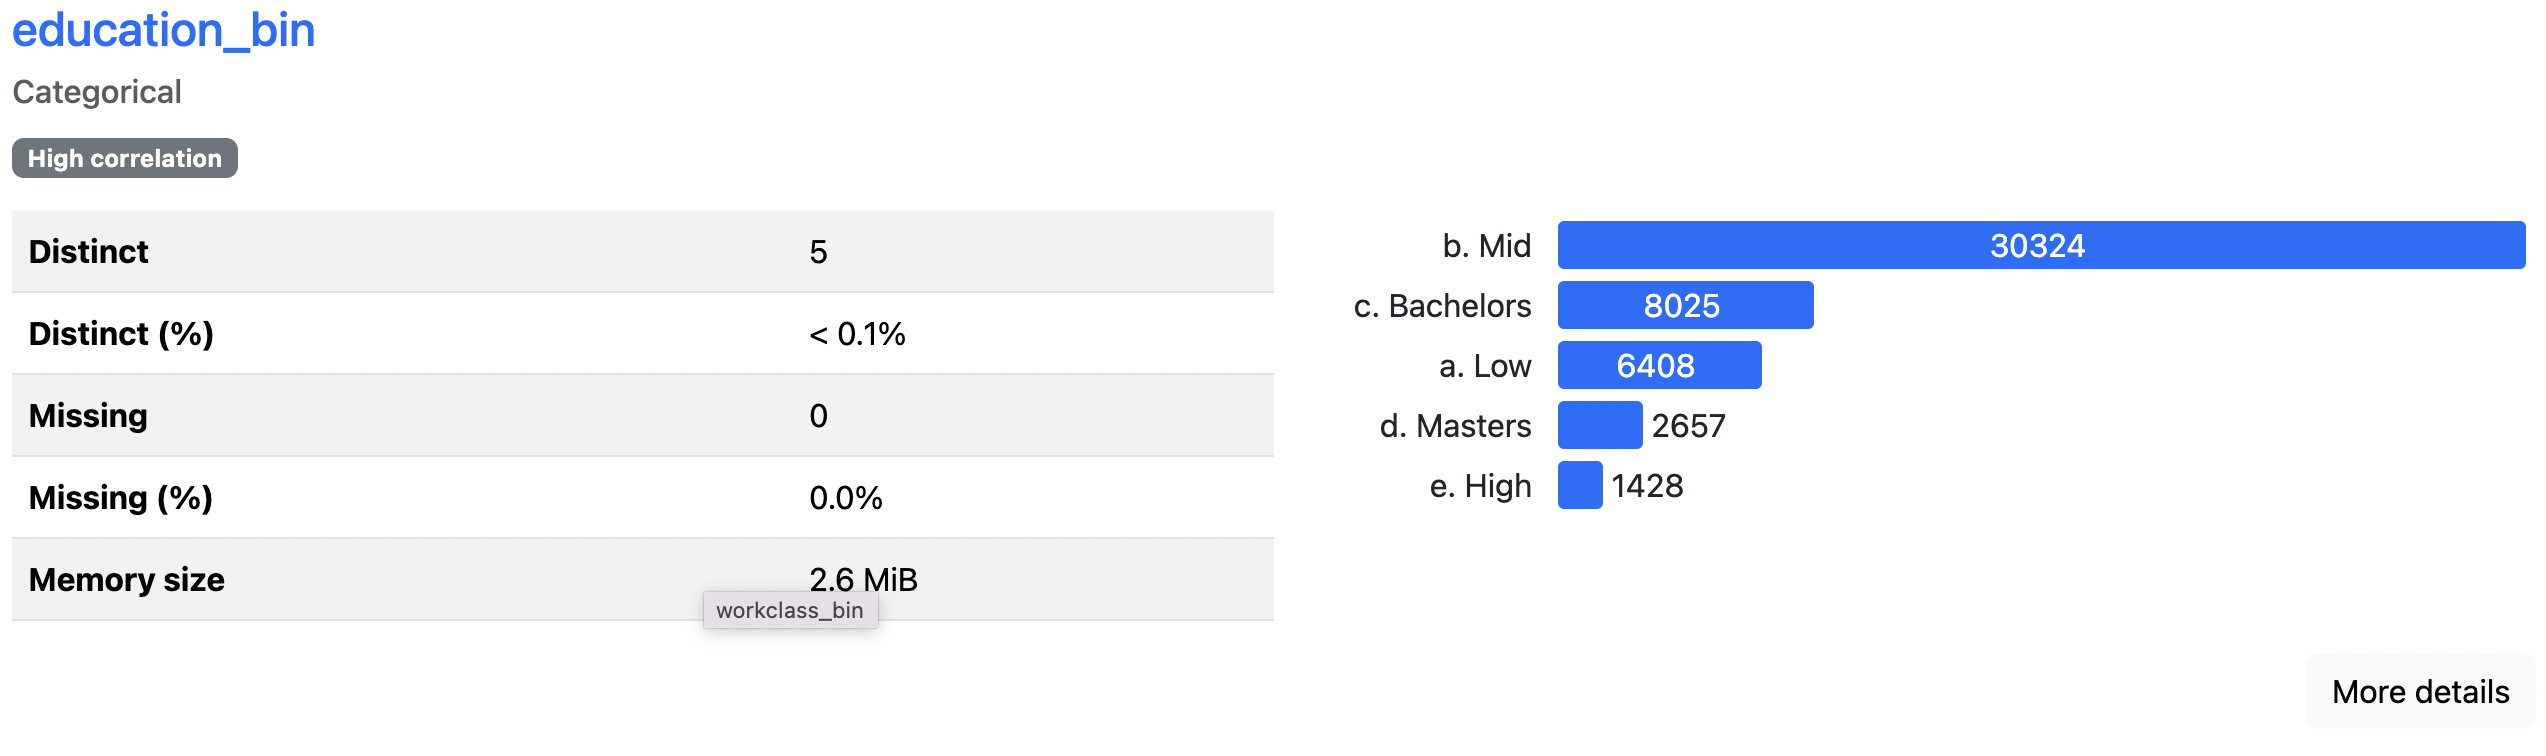

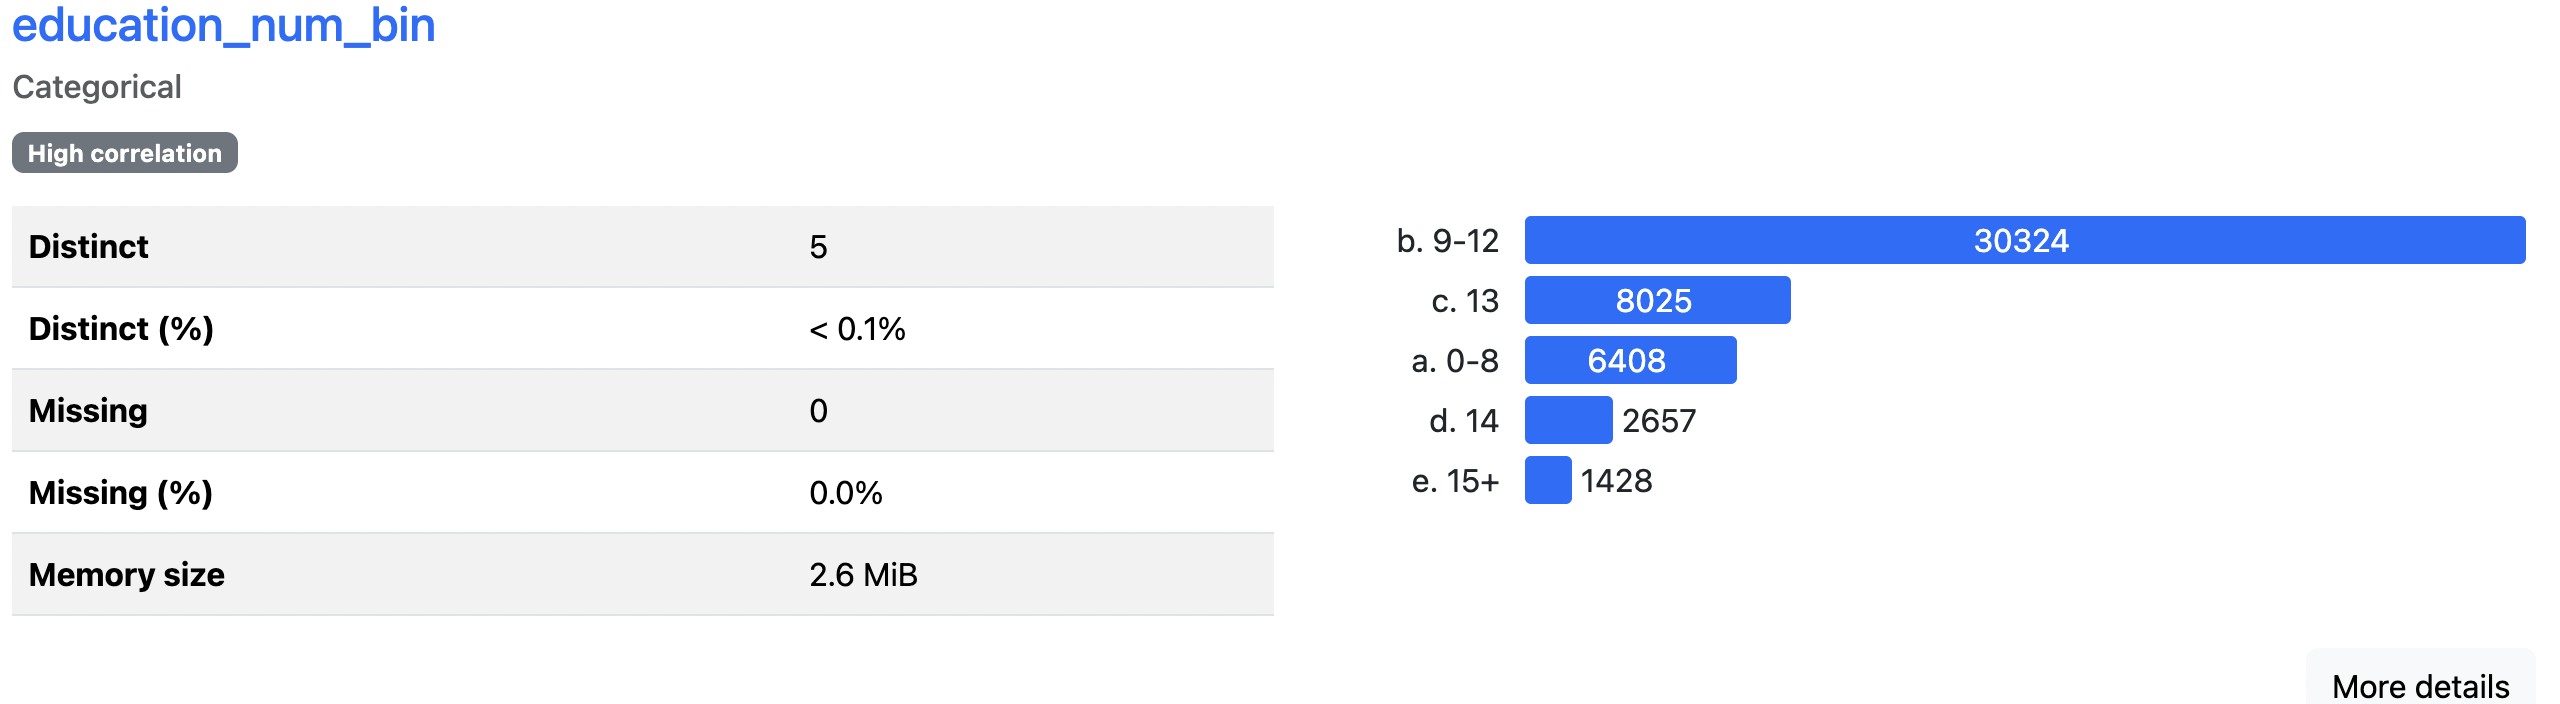

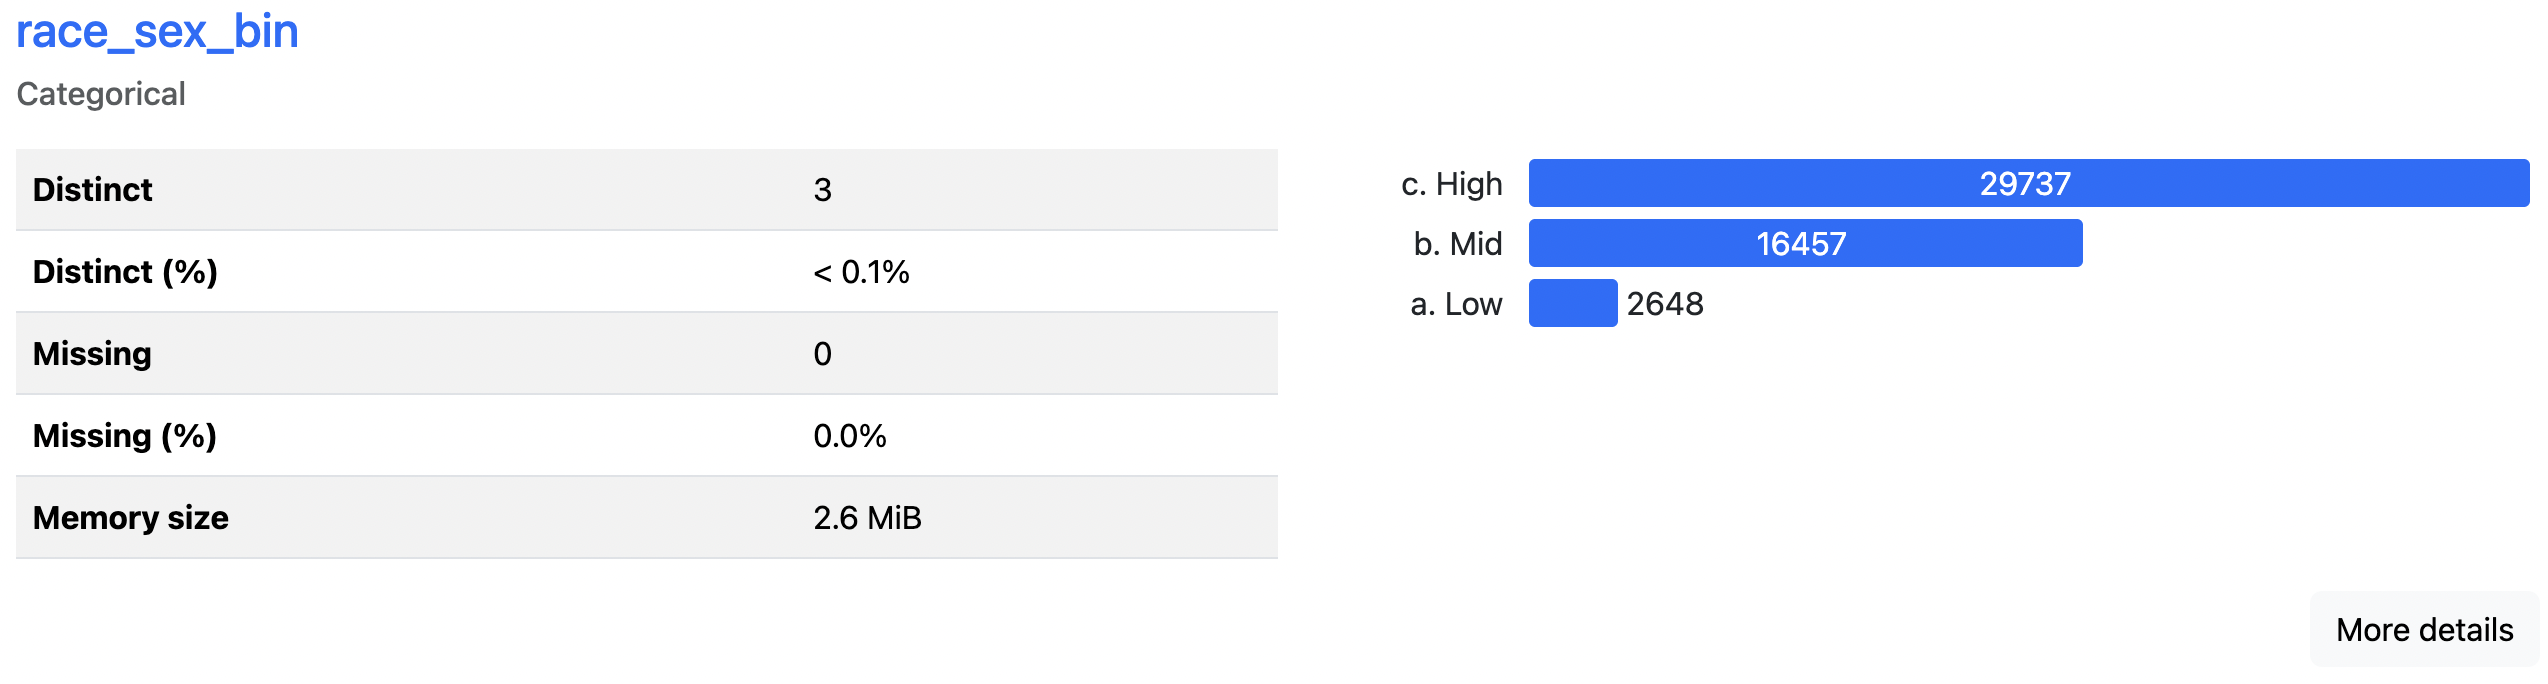

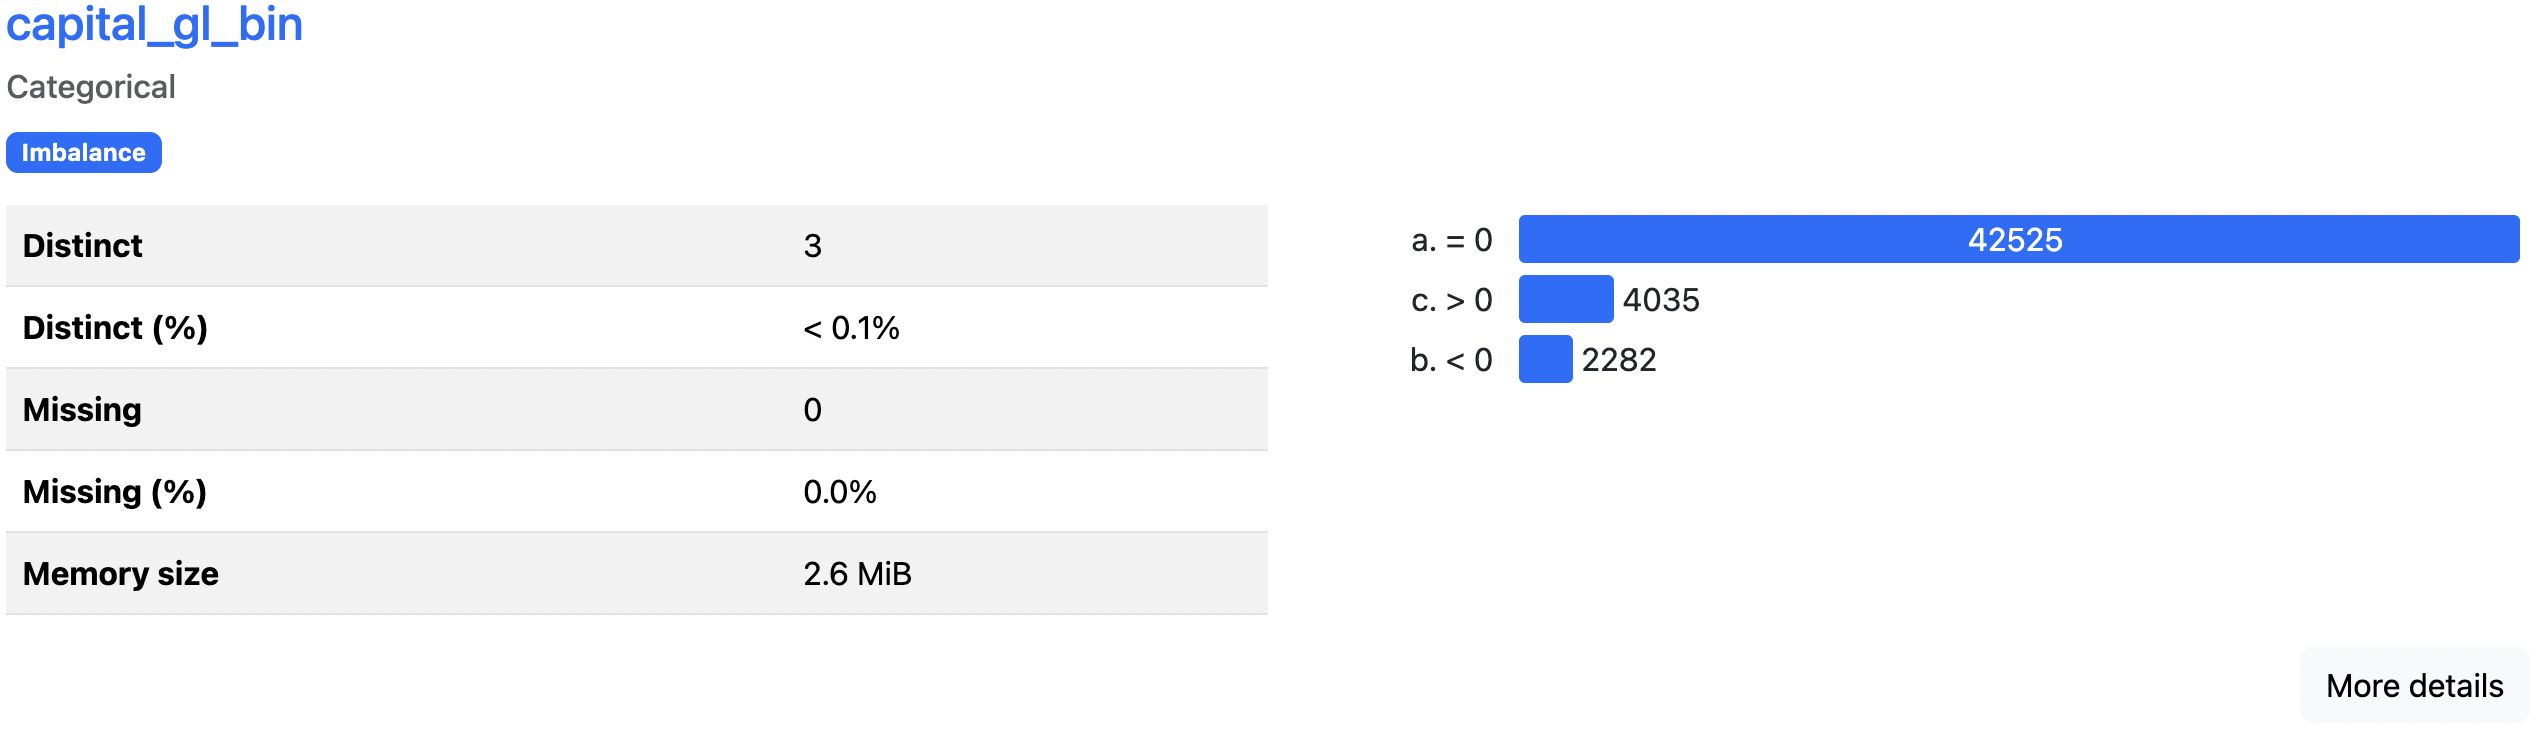

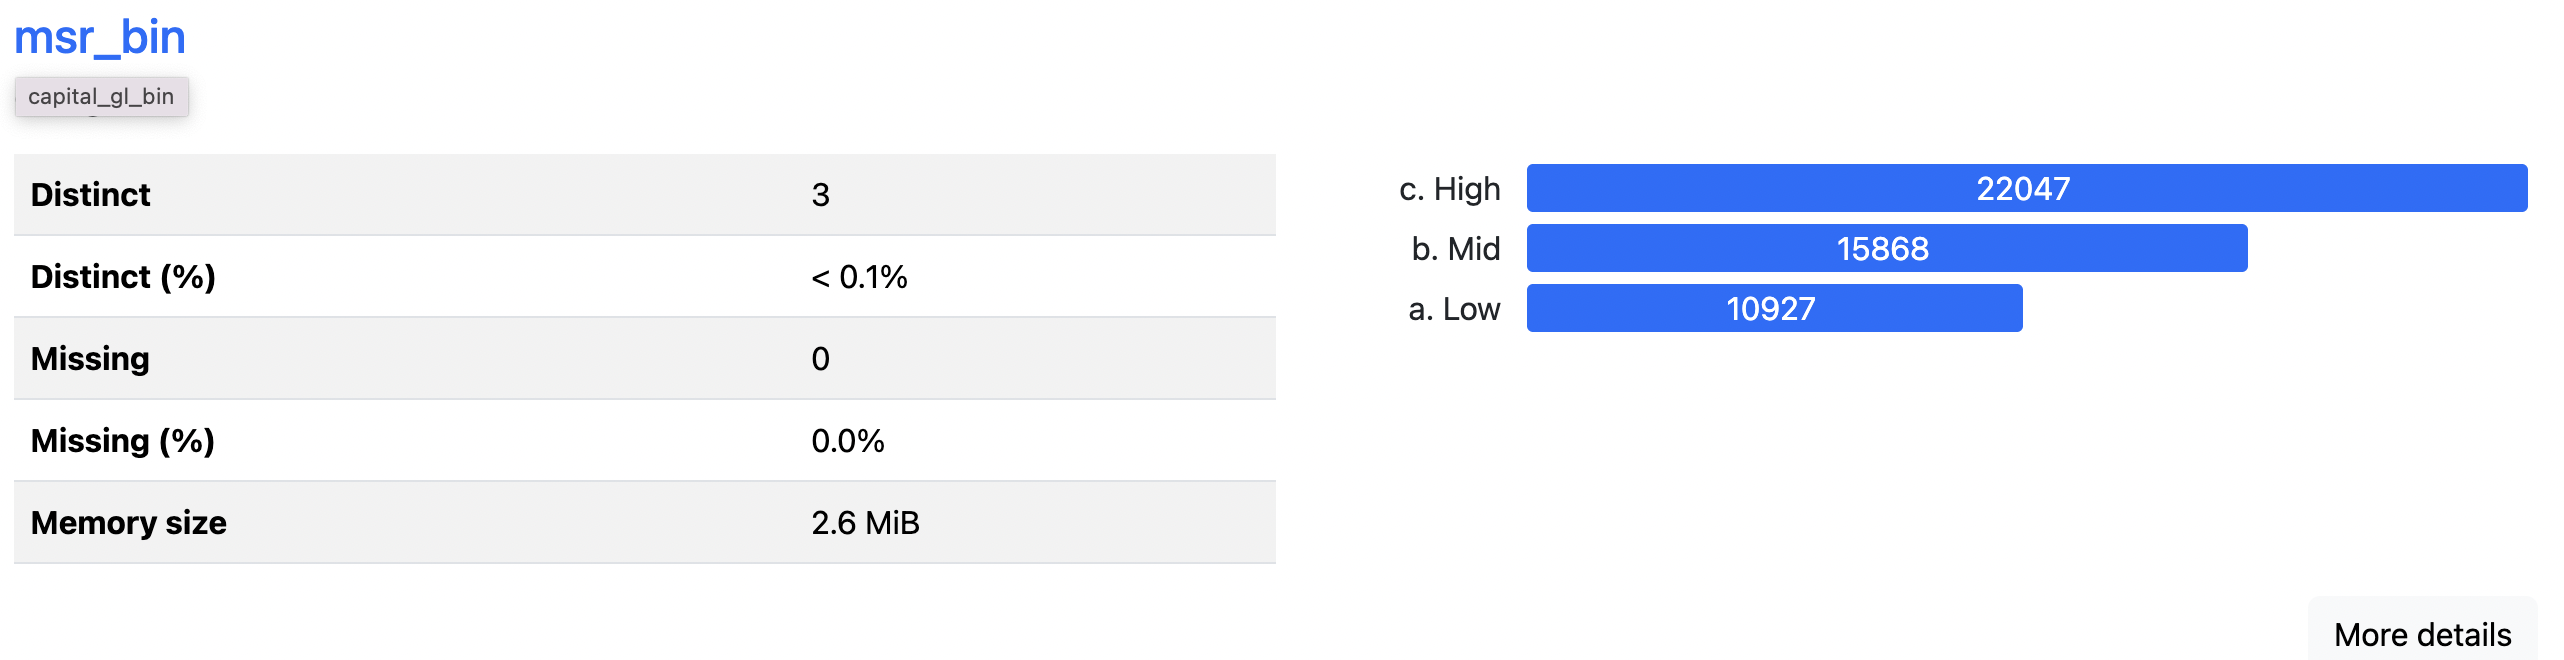

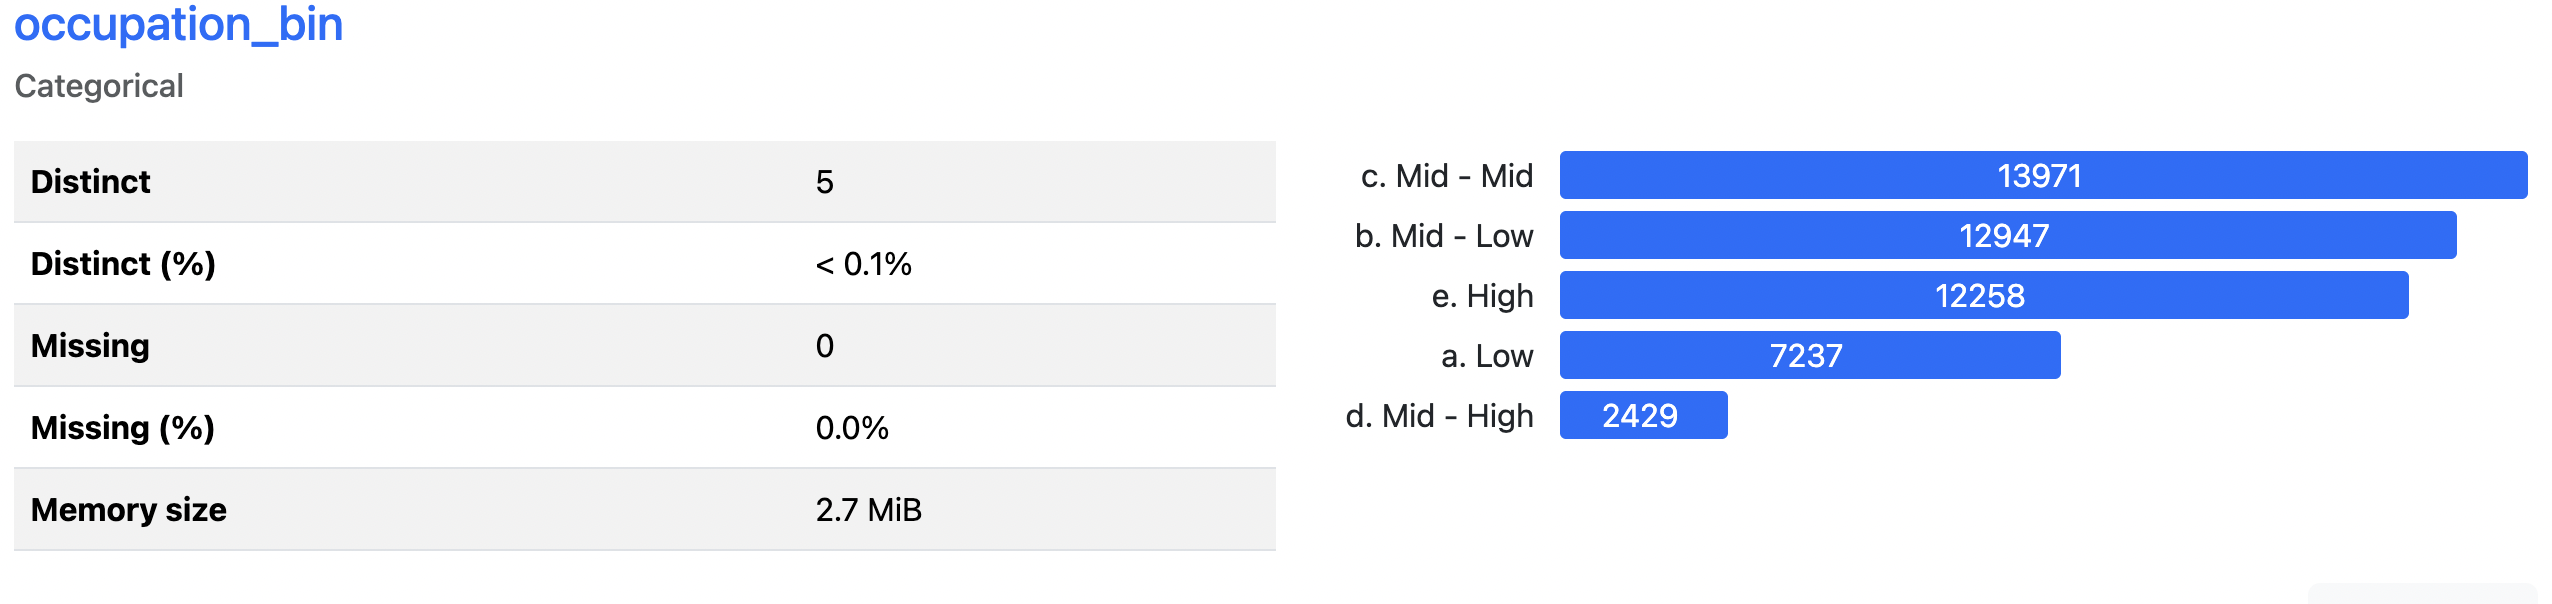

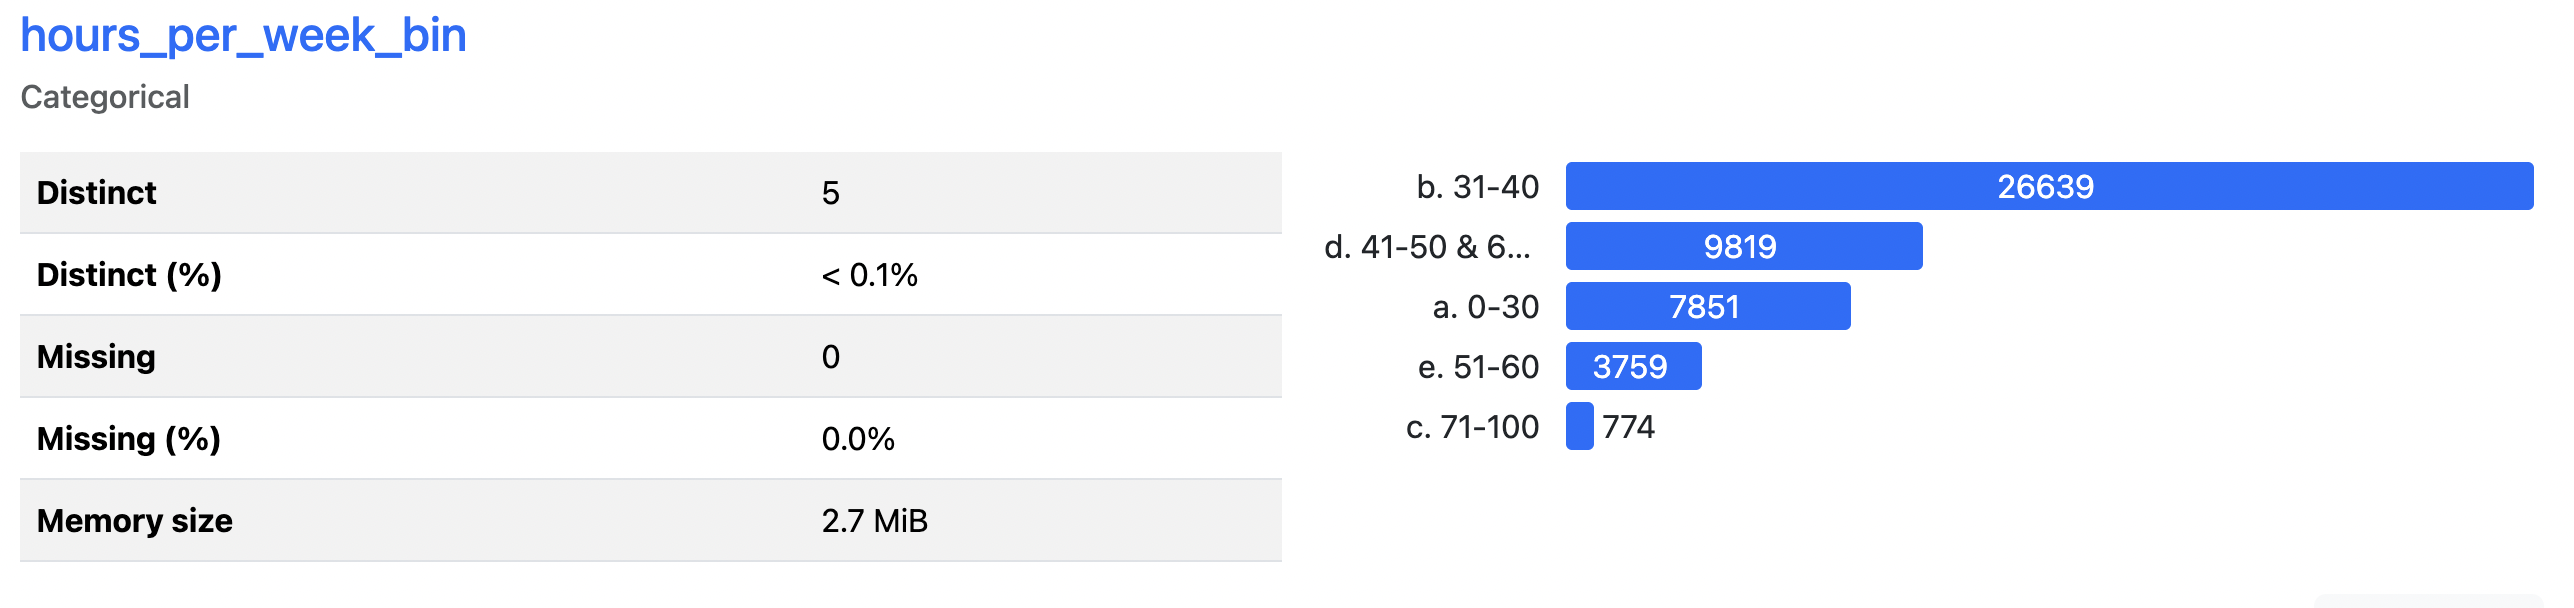

In [ ]:
#descriptive statistics for each column
df.describe(include='all')

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   
mean                  NaN            NaN      NaN            NaN          NaN   
std                   NaN            NaN      NaN            NaN          NaN   
min                   NaN            NaN      NaN            NaN          NaN   
25%                   NaN            NaN      NaN            NaN          NaN   
50%                   NaN            NaN      NaN            NaN          NaN   
75%                   NaN            NaN      NaN            NaN          NaN   
max                   NaN            NaN      NaN            NaN          NaN   

       education_num_bin education_bin workclass_bin   age_bin   flag  \
count              48842         48842         48842     48842  48842   
unique                 5             5             2         5      2   
top              b. 9-12        b. Mid     b. income  e. 40-55  train   
freq               30324         30324         46012     13963  32561   
mean                 NaN           NaN           NaN       NaN    NaN   
std                  NaN           NaN           NaN       NaN    NaN   
min                  NaN           NaN           NaN       NaN    NaN   
25%                  NaN           NaN           NaN       NaN    NaN   
50%                  NaN           NaN           NaN       NaN    NaN   
75%                  NaN           NaN           NaN       NaN    NaN   
max                  NaN           NaN           NaN       NaN    NaN   

                   y  
count   48842.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.239282  
std         0.426649  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

**Q.1 Why does it makes sense to discretize columns for this problem?**

It makes sense to discretize columns for this problem because several features, such as age, hours worked per week, and capital gains, are continuous numerical variables. If these values were left continuous, the decision tree could create splits based on very specific numeric thresholds, resulting in a large number of branches and a more complex tree. By discretizing these values into bins, ranges of values are grouped together, reducing unnecessary splits and simplifying the model. This also reflects real-world reasoning, where small differences (for example, between a 50-year-old and a 51-year-old) are unlikely to meaningfully affect income outcomes. Overall, discretization helps reduce model complexity and lowers the risk of overfitting.

**Q.2 What might be the issues (if any) if we DID NOT discretize the column**

If the columns were not discretized, the decision tree would be more prone to overfitting, as it could create splits based on every distinct numeric value. Small variations in age, capital gain, or hours worked per week, which may have minimal real-world impact, could lead to very different split decisions in the tree. This would result in a highly complex model that fits the training data too closely and may not generalize well to new data.

In [ ]:
#data quality report
dq_report = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100,
    'Unique Values': df.nunique()
})


In [ ]:
#outlier check
numeric_df = df.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound))

dq_report['Outlier'] = outliers.sum()
dq_report


Data Type  Non-Null Count  Missing Values  Missing %  \
hours_per_week_bin    object           48842               0        0.0   
occupation_bin        object           48842               0        0.0   
msr_bin               object           48842               0        0.0   
capital_gl_bin        object           48842               0        0.0   
race_sex_bin          object           48842               0        0.0   
education_num_bin     object           48842               0        0.0   
education_bin         object           48842               0        0.0   
workclass_bin         object           48842               0        0.0   
age_bin               object           48842               0        0.0   
flag                  object           48842               0        0.0   
y                      int64           48842               0        0.0   

                    Unique Values  Outlier  
hours_per_week_bin              5      NaN  
occupation_bin                  5      NaN  
msr_bin                         3      NaN  
capital_gl_bin                  3      NaN  
race_sex_bin                    3      NaN  
education_num_bin               5      NaN  
education_bin                   5      NaN  
workclass_bin                   2      NaN  
age_bin                         5      NaN  
flag                            2      NaN  
y                               2  11687.0

**Data** **cleaning**

This data set is based on "bins" and not continuous variables so it is likely there will be duplicates as each variable is in a category rather than being represented by the individual number. Dropping the duplicates will skew the data as the duplicates represents categories that often appear together.

In [ ]:
#data cleaning

#dropping one of the education columns since highly correlated
df.drop('education_num_bin', axis=1, inplace=True)


In [ ]:
#label encoding and splitting the data

from sklearn.preprocessing import LabelEncoder
le_income = LabelEncoder()
df['y'] = le_income.fit_transform(df['y'])


In [ ]:
label_encoders = {}

categorical_cols = df.select_dtypes(include='object').columns

# remove flag from encoding if it's categorical
categorical_cols = categorical_cols.drop('flag')

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
train_df = df[df['flag'] == 'train']
test_df  = df[df['flag'] == 'test']

x_train = train_df.drop(['y', 'flag'], axis=1)
y_train = train_df.y

x_test = test_df.drop(['y', 'flag'], axis=1)
y_test = test_df.y


# **3. Build Decision Tree Classifier Models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(
    max_depth=10,
    random_state=101,
    max_features=None,
    min_samples_leaf=15
)

dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

# **4. Evaluate Decision Tree Performance**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[11607   828]
 [ 1709  2137]]


In [ ]:
#extracting results
TN, FP, FN, TP = cm.ravel()

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)


True Negatives (TN): 11607
False Positives (FP): 828
False Negatives (FN): 1709
True Positives (TP): 2137


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8441741907745225


In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7207419898819561


In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.5556422256890275


In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6275143150785494


# **5. Tune Decision Tree Performance**

**Q.3 Decision Tree Hyper-parameter variation vs. performance**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

run1_results = []

for criter in ["gini", "entropy"]:

    classf = DecisionTreeClassifier(
        criterion=criter,
        random_state=101
    )

    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)

    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    run1_results.append({
        "criterion": criter,
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "f1": f1_score(y_test, pred),
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

run1_df = pd.DataFrame(run1_results)
display(run1_df)

best_criterion = run1_df.sort_values("accuracy", ascending=False).iloc[0]["criterion"]
print("Best criterion:", best_criterion)

criterion  accuracy  precision    recall        f1    TP     TN   FP    FN
0      gini  0.836558   0.692433  0.554342  0.615740  2132  11488  947  1714
1   entropy  0.836374   0.691510  0.554862  0.615695  2134  11483  952  1712

Best criterion: gini


In [ ]:
run2_results = []

for leaf in [5, 10, 15, 20, 25, 30, 35, 40]:

    classf = DecisionTreeClassifier(
        criterion=best_criterion,
        min_samples_leaf=leaf,
        random_state=101
    )

    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)

    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    run2_results.append({
        "min_samples_leaf": leaf,
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "f1": f1_score(y_test, pred),
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

run2_df = pd.DataFrame(run2_results)
display(run2_df)

best_leaf = int(run2_df.sort_values("accuracy", ascending=False).iloc[0]["min_samples_leaf"])
print("Best min_samples_leaf:", best_leaf)

min_samples_leaf  accuracy  precision    recall        f1    TP     TN  \
0                 5  0.839936   0.701560  0.561102  0.623519  2158  11517   
1                10  0.840305   0.703995  0.559022  0.623188  2150  11531   
2                15  0.842332   0.709329  0.563443  0.628025  2167  11547   
3                20  0.842516   0.704140  0.574883  0.632980  2211  11506   
4                25  0.842762   0.707152  0.570723  0.631655  2195  11526   
5                30  0.843069   0.711848  0.563963  0.629334  2169  11557   
6                35  0.843007   0.713859  0.559802  0.627514  2153  11572   
7                40  0.843069   0.716393  0.555642  0.625860  2137  11589   

    FP    FN  
0  918  1688  
1  904  1696  
2  888  1679  
3  929  1635  
4  909  1651  
5  878  1677  
6  863  1693  
7  846  1709

Best min_samples_leaf: 40


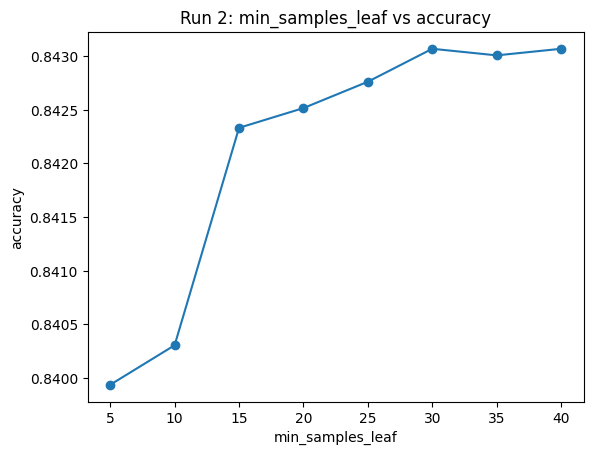

In [ ]:
plt.plot(run2_df["min_samples_leaf"], run2_df["accuracy"], marker="o")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.title("Run 2: min_samples_leaf vs accuracy")
plt.show()

In [ ]:
run3_results = []

for mf in [None, "sqrt", 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:

    classf = DecisionTreeClassifier(
        criterion=best_criterion,
        min_samples_leaf=best_leaf,
        max_features=mf,
        random_state=101
    )

    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)

    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    run3_results.append({
        "max_features": mf,
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "f1": f1_score(y_test, pred),
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

run3_df = pd.DataFrame(run3_results)
display(run3_df)

best_max_features = run3_df.sort_values("accuracy", ascending=False).iloc[0]["max_features"]
print("Best max_features:", best_max_features)


max_features  accuracy  precision    recall        f1    TP     TN   FP  \
0         None  0.843069   0.716393  0.555642  0.625860  2137  11589  846   
1         sqrt  0.840550   0.708056  0.553042  0.621022  2127  11558  877   
2          0.3  0.840550   0.708056  0.553042  0.621022  2127  11558  877   
3          0.4  0.842516   0.714812  0.554602  0.624597  2133  11584  851   
4          0.5  0.845280   0.727772  0.551222  0.627312  2120  11642  793   
5          0.6  0.845280   0.727772  0.551222  0.627312  2120  11642  793   
6          0.7  0.843253   0.709385  0.569943  0.632065  2192  11537  898   
7          0.8  0.842024   0.704692  0.570203  0.630354  2193  11516  919   

     FN  
0  1709  
1  1719  
2  1719  
3  1713  
4  1726  
5  1726  
6  1654  
7  1653

Best max_features: 0.6


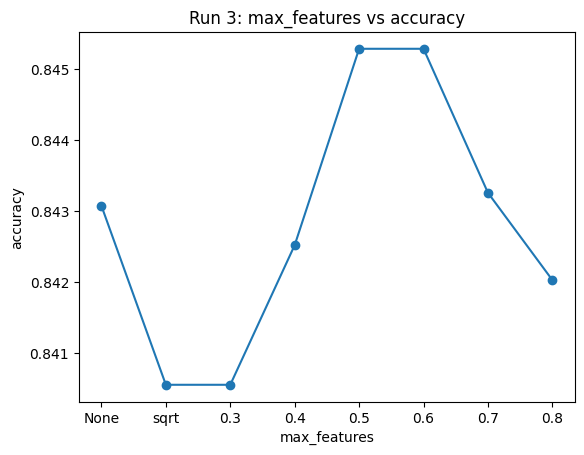

In [ ]:
plt.plot(run3_df["max_features"].astype(str), run3_df["accuracy"], marker="o")
plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.title("Run 3: max_features vs accuracy")
plt.show()

In [ ]:
run4_results = []

for depth in [2, 4, 6, 8, 10, 12, 14, 16]:

    classf = DecisionTreeClassifier(
        criterion=best_criterion,
        min_samples_leaf=best_leaf,
        max_features=best_max_features,
        max_depth=depth,
        random_state=101
    )

    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)

    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    run4_results.append({
        "max_depth": depth,
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "f1": f1_score(y_test, pred),
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

run4_df = pd.DataFrame(run4_results)
display(run4_df)

best_depth = int(run4_df.sort_values("accuracy", ascending=False).iloc[0]["max_depth"])
print("Best max_depth:", best_depth)

max_depth  accuracy  precision    recall        f1    TP     TN   FP    FN
0          2  0.801671   0.735676  0.250390  0.373618   963  12089  346  2883
1          4  0.823291   0.739733  0.388716  0.509630  1495  11909  526  2351
2          6  0.838831   0.706558  0.543422  0.614345  2090  11567  868  1756
3          8  0.843191   0.710518  0.567343  0.630909  2182  11546  889  1664
4         10  0.845157   0.711189  0.580083  0.638980  2231  11529  906  1615
5         12  0.842516   0.709340  0.564743  0.628836  2172  11545  890  1674
6         14  0.841717   0.700221  0.576963  0.632644  2219  11485  950  1627
7         16  0.845280   0.727772  0.551222  0.627312  2120  11642  793  1726

Best max_depth: 16


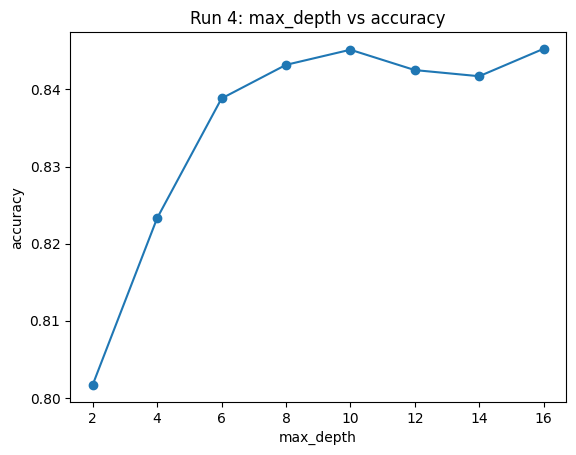

In [ ]:
plt.plot(run4_df["max_depth"], run4_df["accuracy"], marker="o")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Run 4: max_depth vs accuracy")
plt.show()

In [ ]:
final_model = DecisionTreeClassifier(
    criterion=best_criterion,
    min_samples_leaf=best_leaf,
    max_features=best_max_features,
    max_depth=best_depth,
    random_state=101
)

final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)

print("Final Accuracy:", accuracy_score(y_test, final_pred))
print("Best Parameters:")
print("criterion =", best_criterion)
print("min_samples_leaf =", best_leaf)
print("max_features =", best_max_features)
print("max_depth =", best_depth)

Final Accuracy: 0.8452797739696579
Best Parameters:
criterion = gini
min_samples_leaf = 40
max_features = 0.6
max_depth = 16


In [ ]:
import time

start_time = time.time()

final_model.fit(x_train, y_train)

end_time = time.time()

total_time = end_time - start_time

print("Total training time (seconds):", total_time)


Total training time (seconds): 0.02383589744567871


In [ ]:
!pip install graphviz

# **6. Visualize Your Best Decision Tree using GraphViz**

In [ ]:
import re
from sklearn.tree import export_graphviz
import graphviz

safe_feature_names = [re.sub(r'[^0-9a-zA-Z_]+', '_', str(c)) for c in x_train.columns]

dot_data = export_graphviz(
    final_model,
    out_file=None,
    feature_names=safe_feature_names,
    class_names=["LE_50K", "GT_50K"],
    filled=True,
    rounded=True,
    special_characters=False
)

graphviz.Source(dot_data)

#the visual is too large to upload to github. Please run the code to see the final decision tree visualization.

# **7. Conclusion**

**Q.4 How long was your total run time to train the best model?**

Based on the time measurement cell in our notebook, the total run time to train the best-performing decision tree was approximately 0.021 seconds. Given the dataset size and the selected hyperparameters, this indicates that training was computationally efficient. Since decision trees do not require iterative optimization like some other models, the training process was relatively fast even with tuning applied.

**Q.5 Did you find the BEST TREE?**

Not necessarily. We selected the best-performing tree from the specific hyperparameter combinations we tested (including max_depth = 16, min_samples_leaf = 40, max_features = 0.6, and criterion = gini). However, this does not guarantee that it is the absolute best possible tree overall.

There are additional hyperparameters (such as min_samples_split, max_leaf_nodes, or different depth limits) that were not explored in this analysis. It is possible that a different combination outside our tested grid could achieve better performance. The final model achieved approximately 82.35% test accuracy, which shows strong predictive ability but confirms that the model is not perfect and could potentially be further optimized.

**Q.6 Write your observations from the visualization of the best tree**

From the visualization of the best-performing decision tree, the root node begins with the MSR (Marriage Status & Relationship) bin, indicating that it was the most informative feature for the first split based on Gini impurity. If that condition is false, the tree evaluates capital gains; if true, it moves to occupation_bin. This suggests that relationship status, capital gains, and occupation are strong predictors of income category in this dataset.

The tree was limited to a maximum depth of 16, which was one of the selected hyperparameter constraints. Although the tree is relatively deep, several terminal nodes still show non-zero Gini impurity values, meaning the leaves are not perfectly pure. This indicates that the model does not completely separate the income classes.

Additionally, occupation_bin appears more frequently in upper and mid-level splits compared to race_sex_bin, suggesting occupation has greater predictive influence. Toward the bottom of the tree, age_bin appears more often, indicating that age refines predictions after broader splits have already been made.

**Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)**

This tree is not fully grown. A fully grown decision tree would have no constraints on parameters such as max_depth, min_samples_leaf, or min_samples_split, allowing it to continue splitting until all leaves are pure.

In our model, we imposed constraints including max_depth = 16 and min_samples_leaf = 40, which prevent excessive splitting. Because of these limitations, the tree cannot perfectly memorize the training data. The presence of non-zero Gini values in the leaf nodes further confirms that the model is not fully grown. While some risk of overfitting may still exist due to the tree’s depth, the imposed constraints help reduce that risk.

# **8. Prediction using your “trained” Decision Tree Mode**

In [ ]:
import pandas as pd
import re


model = final_model

def normalize(s: str) -> str:
    """Normalize strings so tiny dash differences don’t break matching."""
    return (str(s)
            .replace("–", "-")
            .replace("—", "-")
            .replace("  ", " ")
            .strip()
            .lower())

def pick_label_contains(col, target_text):
    """Pick the EXACT label from label_encoders[col].classes_ that contains target_text."""
    target = normalize(target_text)
    classes = list(label_encoders[col].classes_)
    for c in classes:
        if target in normalize(c):
            return c
    raise ValueError(f"Could not find a class in {col} containing '{target_text}'. Classes were: {classes}")

def pick_range_label(value, classes):
    """
    Map a numeric value to a class label like:
    'a. 0-30' or 'd. 41-50 & 61-70'
    """
    v = float(value)
    for lab in classes:
        txt = str(lab)

        # find all ranges like 41-50 or 61-70 inside the label
        ranges = re.findall(r'(\d+)\s*-\s*(\d+)', txt)
        for lo, hi in ranges:
            lo, hi = float(lo), float(hi)
            if lo <= v <= hi:
                return lab

    raise ValueError(f"Could not map value={value} to any bin label in: {list(classes)}")

# 1) Build the row using the assignment’s info
row_labels = {}

# hours worked per week = 48
row_labels["hours_per_week_bin"] = pick_range_label(
    48, label_encoders["hours_per_week_bin"].classes_
)

# occupation = Mid - Low
row_labels["occupation_bin"] = pick_label_contains("occupation_bin", "Mid - Low")

# marriage status & relationships = High
row_labels["msr_bin"] = pick_label_contains("msr_bin", "High")

# capital gain = Yes -> capital_gl_bin classes look like: 'a. = 0', 'b. < 0', 'c. > 0'
row_labels["capital_gl_bin"] = pick_label_contains("capital_gl_bin", "> 0")

# race-sex group = Mid
row_labels["race_sex_bin"] = pick_label_contains("race_sex_bin", "Mid")

# education category = High
row_labels["education_bin"] = pick_label_contains("education_bin", "High")

# work class = Income
row_labels["workclass_bin"] = pick_label_contains("workclass_bin", "income")

# age = 58
row_labels["age_bin"] = pick_range_label(
    58, label_encoders["age_bin"].classes_
)

# 2) Convert to DataFrame in the SAME column order as training
new_df = pd.DataFrame([row_labels]).reindex(columns=x_train.columns)

# 3) Apply the SAME encoders used in training
for col in new_df.columns:
    if col in label_encoders:
        new_df[col] = label_encoders[col].transform(new_df[col].astype(str))

# 4) Predict + probability
pred_num = model.predict(new_df)[0]
proba = model.predict_proba(new_df)[0]          # [P(class0), P(class1)]

pred_label = "<=50K" if pred_num == 0 else ">50K"
prob_correct = float(proba.max())              # probability of the predicted class

print("Q8 Prediction:", pred_label)
print("Probability prediction is correct:", prob_correct)
print("Probabilities [<=50K, >50K]:", proba)
print("Row used (encoded):")
display(new_df)


Q8 Prediction: >50K
Probability prediction is correct: 0.8235294117647058
Probabilities [<=50K, >50K]: [0.17647059 0.82352941]
Row used (encoded):


hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  race_sex_bin  \
0                   3               1        2               2             1   

   education_bin  workclass_bin  age_bin  
0              4              0        3

chatgpt link. Please scroll up to see project related chats.
https://chatgpt.com/share/e/6994dd80-f6a4-800d-89c1-2dc0231349b3
